In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']
L_markers = ['s', '^', 'v', 'd', 'P']

In [2]:
# closure test? i.e. there is truth pythia data somewhere to compare to
closure = True

# define binnings
n_bins = 9 # WARNING RooUnfold seg faults if too many bins used
binning = np.linspace(20,40,10)
bincenters = get_lin_bincenters(binning)
binwidths = get_binwidths(binning)

labels = "jet $p_T$"

n_iter = 8

In [3]:
len(binning)

10

In [4]:
# file defs, hist imports

f_unfolded = ur.open("./unfolded_fr.root")
f_preunfold = ur.open("./preunfold_fr.root")

# Data, reco [theta_unknown_S]
h3_raw = f_preunfold["raw"]
h1_raw = f_preunfold["raw1D"]

# MC, reco [theta0_S]
h3_reco = f_preunfold["reco"]
h1_reco = f_preunfold["reco1D"]

# MC, true [theta0_G]
h3_gen = f_preunfold["gen"]
h1_gen = f_preunfold["gen1D"]

h3_unfolded = []
for i in range(1,n_iter+1):
    h3_unfolded.append(f_unfolded["Baysian_Unfoldediter{}".format(i)])

h1_unfolded = []
for i in range(1,n_iter+1):
    h1_unfolded.append(f_unfolded["Baysian_Unfolded1Diter{}".format(i)])


In [5]:
proj = lambda a : a.values()
proj_err = lambda a : a.errors()

theta0_G = proj(h1_gen)
theta0_S = proj(h1_reco)
theta_unknown_S = proj(h1_raw)

theta_unfolded = [proj(a) for a in h1_unfolded]

theta0_G_err = proj_err(h1_gen)
theta0_S_err = proj_err(h1_reco)
theta_unknown_S_err = proj_err(h1_raw)

theta_unfolded_err = [proj_err(a) for a in h1_unfolded]


[25911. 23613. 21827. 20348. 19191. 17690. 16801. 15506. 14569.]
(9,)
[20.         22.22222222 24.44444444 26.66666667 28.88888889 31.11111111
 33.33333333 35.55555556 37.77777778 40.        ]
10
(array([25911., 23613., 21827., 20348., 19191., 17690., 16801., 15506.,
       14569.]), array([20.        , 22.22222222, 24.44444444, 26.66666667, 28.88888889,
       31.11111111, 33.33333333, 35.55555556, 37.77777778, 40.        ]), <BarContainer object of 9 artists>)
9
9


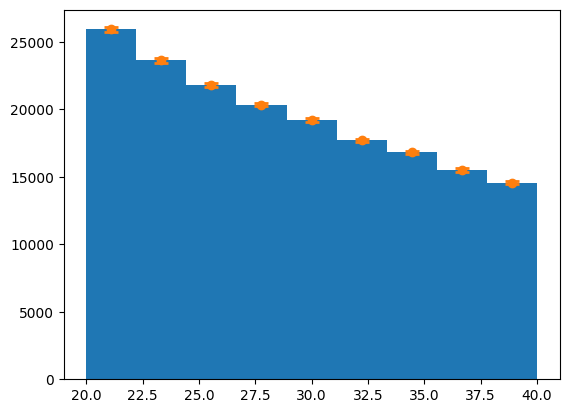

In [6]:
print(theta0_G)
print(theta0_G.shape)
print(binning)
print(len(binning))

print(plt.hist(binning[:-1], binning, weights=theta0_G))
print(len(binning[:-1]))
print(len(theta0_G_err))
plt.errorbar(bincenters, theta0_G, yerr=theta0_G_err, capsize=5, capthick=2, fmt='o', linestyle="None")
plt.show()

In [7]:
for iteration in range(n_iter):
    print(theta_unfolded[iteration])
    print(theta_unfolded_err[iteration])

[2650.14747722 1899.47931401 1415.28602951 1078.58016422  868.41270873
  691.18381933  578.6735339   490.55654102  473.06144818]
[49.08416379 30.70545951 22.30627019 17.07096804 14.35315565 11.99286115
 10.9688881  10.35412444 12.84059216]
[3513.12443566 2194.1619391  1463.03008427  998.22042205  746.12829544
  550.02526077  433.5756891   355.51078431  368.44086213]
[84.36025247 47.84465023 33.32020118 24.07088397 19.72950367 15.8382841
 14.13732662 13.09937051 17.59080349]
[3953.93061198 2290.28928777 1457.34879453  942.38138059  687.33942224
  489.11795121  376.16893469  305.25692444  343.5642888 ]
[106.49654393  62.07131374  43.41546355  30.71440481  24.88323633
  19.51831123  17.0672411   15.42139862  21.48904972]
[4166.05715863 2311.79700048 1447.65336872  911.37886975  662.69592036
  463.31194793  352.32725878  284.32587915  345.46896036]
[119.45767652  73.36508436  51.81518848  36.54385918  29.63411558
  23.06729588  19.97294034  17.71202492  25.02485884]
[4270.65121182 2308.788

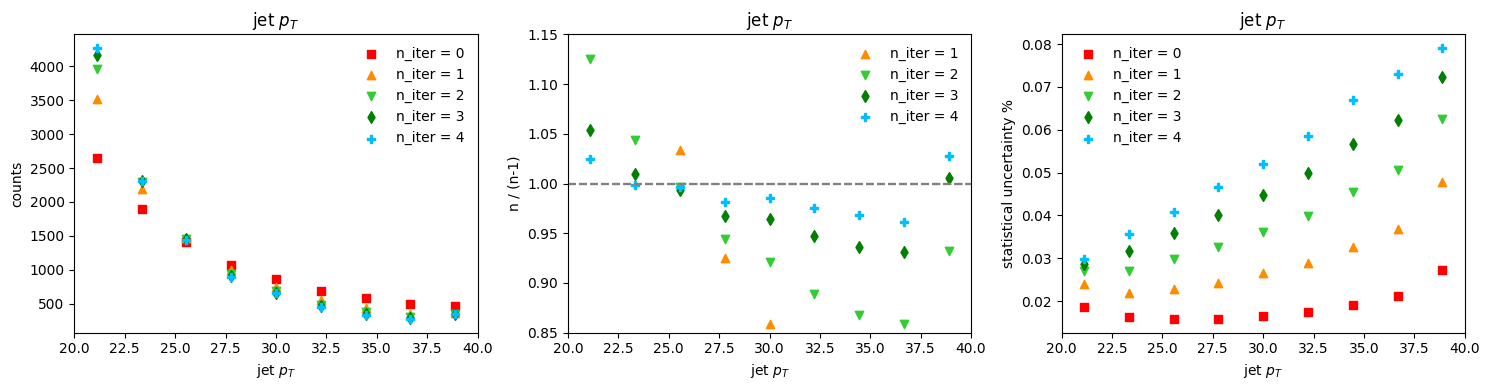

In [8]:
############################## UNFOLDED DISTRIBUTIONS ############################
# EEC distros

it = 5

fig, axes = plt.subplots(1, 3, figsize=(15,4))

pt_lims = [20, 40]

# COL 1: raw jet pt distribution WITH relative error over data, true underneath
ax = axes[0]

for iteration in range(it):

    ax.scatter(bincenters, theta_unfolded[iteration],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
    ax.set_ylabel("counts")
    
    ax.set_title(labels)
    ax.set_xlabel(labels)

    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)

# COL 2: convergence plot (n / n - 1)
ax = axes[1]

for iteration in range(1,it):

    yvals = safe_divide(theta_unfolded[iteration], theta_unfolded[iteration-1], filler=1)
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.hlines(y=1, xmin=binning[0], xmax=binning[len(binning)-1], color='grey', linestyle='--')

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("n / (n-1)")
    ax.legend(frameon=False)

    ax.set_ylim([0.85, 1.15])
    ax.set_xlim(pt_lims)


# COL 3: statistical error %
ax = axes[2]

for iteration in range(it):
    
    yvals = safe_divide(theta_unfolded_err[iteration], theta_unfolded[iteration])
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("statistical uncertainty %")
    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)


fig.tight_layout()
plt.show()
